In [1]:
# Import packages used for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression

In [12]:
# Load the SBA loan data and make a copy for exploration
df = pd.read_csv('SBAnational.csv',low_memory=False)

df_copy = df.copy()

In [13]:
df_copy.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [14]:
df_copy.shape

(899164, 27)

In [15]:
df_copy.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [16]:
# Drop null values from specified columns
df_copy.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df_copy.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [17]:
# Check data types of each feature
df_copy.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [18]:
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [19]:
# Remove '$', commas, and extra spaces from records in columns with dollar values that should be floats
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

In [20]:
# Check the number of each data type in the field
df_copy['ApprovalFY'].apply(type).value_counts()

<class 'str'>    886240
Name: ApprovalFY, dtype: int64

In [21]:
df_copy['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

In [22]:
# Create a function to apply formatting to the records of str type only
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x


df_copy['ApprovalFY'] = df_copy['ApprovalFY'].apply(clean_str).astype('int64')

In [23]:
# Change the type of NewExist to an integer, Zip and UrbanRural to str (categorical) and all currency-related fields to float values
df_copy = df_copy.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Check to see dtypes so far
df_copy.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [24]:
# Create a new column with the industry the NAICS code represents
# Selects only the first two numbers of the NAICS code
df_copy['Industry'] = df_copy['NAICS'].astype('str').apply(lambda x: x[:2])

# Maps the approprate industry to each record based on the first two digits of the NAICS code
df_copy['Industry'] = df_copy['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
       '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

# Remove records where Industry is NaN (NAICS code was a 0)
df_copy.dropna(subset=['Industry'],inplace=True)

In [25]:
# Create flag column IsFranchise based on FranchiseCode column
df_copy.loc[(df_copy['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df_copy.loc[(df_copy['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [26]:
# NewExist
# Makesure NewExist has only 1s and 2s; Remove records where NewExist isn't 1 or 2
df_copy['NewExist'].unique()

array([2, 1, 0], dtype=int64)

In [27]:
# Keep records where NewExist == 1 or 2
df_copy = df_copy[(df_copy['NewExist'] == 1) | (df_copy['NewExist'] == 2)]

# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
df_copy.loc[(df_copy['NewExist'] == 1), 'NewBusiness'] = 0
df_copy.loc[(df_copy['NewExist'] == 2), 'NewBusiness'] = 1

In [28]:
# RevLineCr and LowDoc
# Double check RevLineCr and LowDoc unique values
df_copy['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [29]:
df_copy['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [30]:
# Remove records where RevLineCr != 'Y' or 'N' and LowDoc != 'Y' or 'N'
df_copy = df_copy[(df_copy['RevLineCr'] == 'Y') | (df_copy['RevLineCr'] == 'N')]
df_copy = df_copy[(df_copy['LowDoc'] == 'Y') | (df_copy['LowDoc'] == 'N')]

# RevLineCr and LowDoc: 0 = No, 1 = Yes
df_copy['RevLineCr'] = np.where(df_copy['RevLineCr'] == 'N', 0, 1)
df_copy['LowDoc'] = np.where(df_copy['LowDoc'] == 'N', 0, 1)

# Check that it worked
print(df_copy['RevLineCr'].unique())
print(df_copy['LowDoc'].unique())

[0 1]
[1 0]


In [31]:
# MIS_Status
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan
df_copy['Default'] = np.where(df_copy['MIS_Status'] == 'P I F', 0, 1)
df_copy['Default'].value_counts()

0    358558
1     98382
Name: Default, dtype: int64

In [32]:
# Convert ApprovalDate and DisbursementDate columns to datetime values
# ChgOffDate not changed to datetime since it is not of value and will be removed later
df_copy[['ApprovalDate', 'DisbursementDate']] = df_copy[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [33]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
df_copy['DaysToDisbursement'] = df_copy['DisbursementDate'] - df_copy['ApprovalDate']

# Change DaysToDisbursement from a timedelta64 dtype to an int64 dtype
# Converts series to str, removes all characters after the space before 'd' in days for each record, then changes the dtype to int
df_copy['DaysToDisbursement'] = df_copy['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [34]:
# Create DisbursementFY field for time selection criteria later
df_copy['DisbursementFY'] = df_copy['DisbursementDate'].map(lambda x: x.year)

In [35]:
# Create StateSame flag field which identifies where the business State is the same as the BankState
df_copy['StateSame'] = np.where(df_copy['State'] == df_copy['BankState'], 1, 0)

In [36]:
# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
df_copy['SBA_AppvPct'] = df_copy['SBA_Appv'] / df_copy['GrAppv']

In [37]:
# Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved
df_copy['AppvDisbursed'] = np.where(df_copy['DisbursementGross'] == df_copy['GrAppv'], 1, 0)

In [38]:
df_copy.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int32
LowDoc                         int32
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [39]:
# Format dtypes where necessary after feature engineering
df_copy = df_copy.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
df_copy.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int32
LowDoc                         int32
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [40]:
df_copy.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [41]:
# Verify all null values are removed from data
df_copy.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

In [42]:
# Check the shape of the data as it stands
df_copy.shape

(456940, 21)

In [43]:
# Field for loans backed by Real Estate (loans with a term of at least 20 years)
df_copy['RealEstate'] = np.where(df_copy['Term'] >= 240, 1, 0)

# Field for loans active during the Great Recession (2007-2009)
df_copy['GreatRecession'] = np.where(((2007 <= df_copy['DisbursementFY']) & (df_copy['DisbursementFY'] <= 2009)) | 
                                     ((df_copy['DisbursementFY'] < 2007) & (df_copy['DisbursementFY'] + (df_copy['Term']/12) >= 2007)), 1, 0)

In [44]:
# Select only records with a disbursement year through 2010
df_copy = df_copy[df_copy['DisbursementFY'] <= 2010]

# Check how many records remain
df_copy.shape

(438504, 23)

In [45]:
df_copy.describe(include=['object', 'float', 'int'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
count,438504,438504,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504,438504.000000,438504.000000,...,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59171,55644,NaN,NaN,NaN,NaN,NaN,270482,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.665604,94.119445,9.794887,1.843611,4.568973,NaN,0.418959,0.057247,...,0.030597,0.263840,0.221918,109.090631,2002.705704,0.454094,0.654071,0.636478,0.111972,0.733934
std,NaN,NaN,5.492623,68.548785,57.674184,16.496650,15.330176,NaN,0.493389,0.232314,...,0.172224,0.440714,0.415537,182.221498,5.403909,0.497889,0.179932,0.481014,0.315332,0.441900
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3614.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,0.000000,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829994,1.000000,0.000000,1.000000


In [46]:
# Create flag to signify if a larger amount was disbursed than what the Bank had approved
# Likely RevLineCr?
df_copy['DisbursedGreaterAppv'] = np.where(df_copy['DisbursementGross'] > df_copy['GrAppv'], 1, 0)

In [47]:
# Remove records with loans disbursed prior to being approved
df_copy = df_copy[df_copy['DaysToDisbursement'] >= 0]

# Check how many records are left
df_copy.shape

(438090, 24)

In [48]:
df_copy.describe(include=['object', 'float', 'int'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession,DisbursedGreaterAppv
count,438090,438090,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090,438090.000000,438090.000000,...,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59121,55628,NaN,NaN,NaN,NaN,NaN,270261,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.662987,94.113178,9.795026,1.843525,4.567514,NaN,0.419122,0.057189,...,0.263825,0.222039,109.220368,2002.703264,0.453993,0.654037,0.636351,0.111979,0.734509,0.314639
std,NaN,NaN,5.490509,68.545279,57.699074,16.503378,15.332166,NaN,0.493416,0.232204,...,0.440706,0.415618,182.165509,5.401641,0.497879,0.179937,0.481050,0.315341,0.441595,0.464372
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829500,1.000000,0.000000,1.000000,1.000000


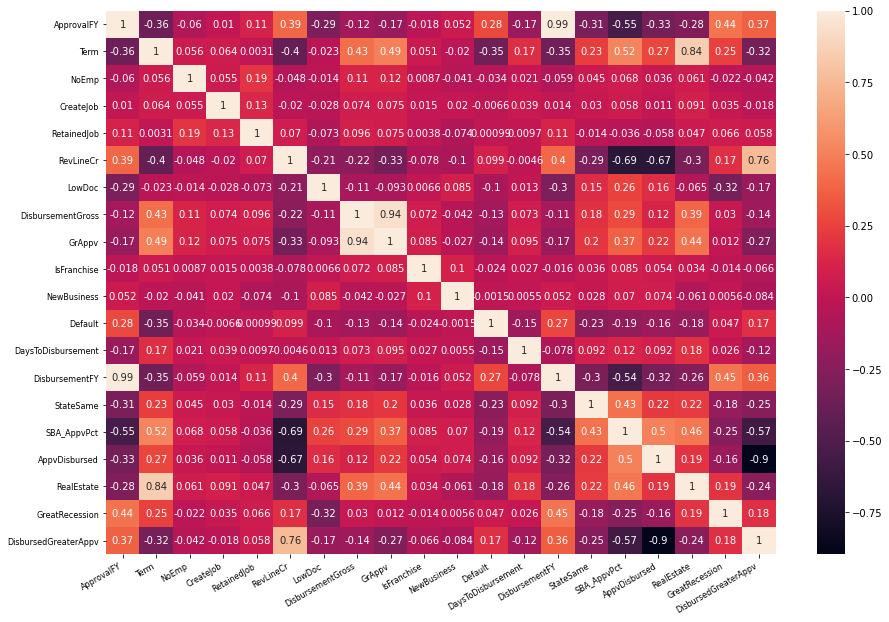

In [49]:
# Correlation Matrix
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = df_copy.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

<ipython-input-50-9d5f22d08753>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)
<ipython-input-50-9d5f22d08753>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)


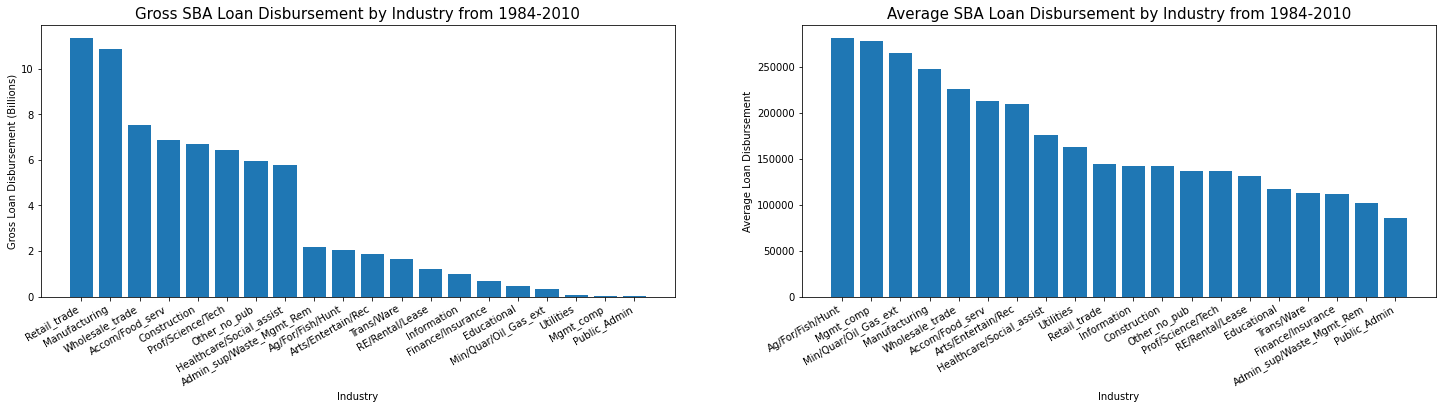

In [50]:
# Total/Average disbursed loan amount by industry
# Create a groupby object on Industry for use in visualization
industry_group = df_copy.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Industry
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()

<ipython-input-51-f178b86abcf2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,


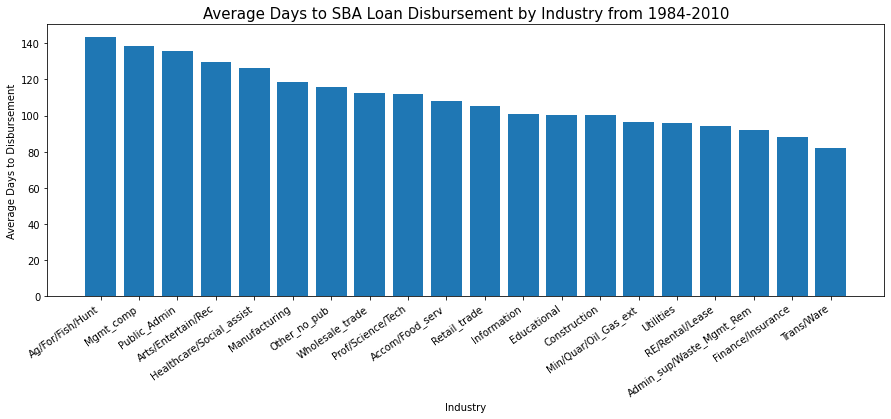

In [51]:
# Average days to disbursement by industry
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

<ipython-input-52-721d35b7f2d3>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1a.set_xticklabels(df_copy.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,


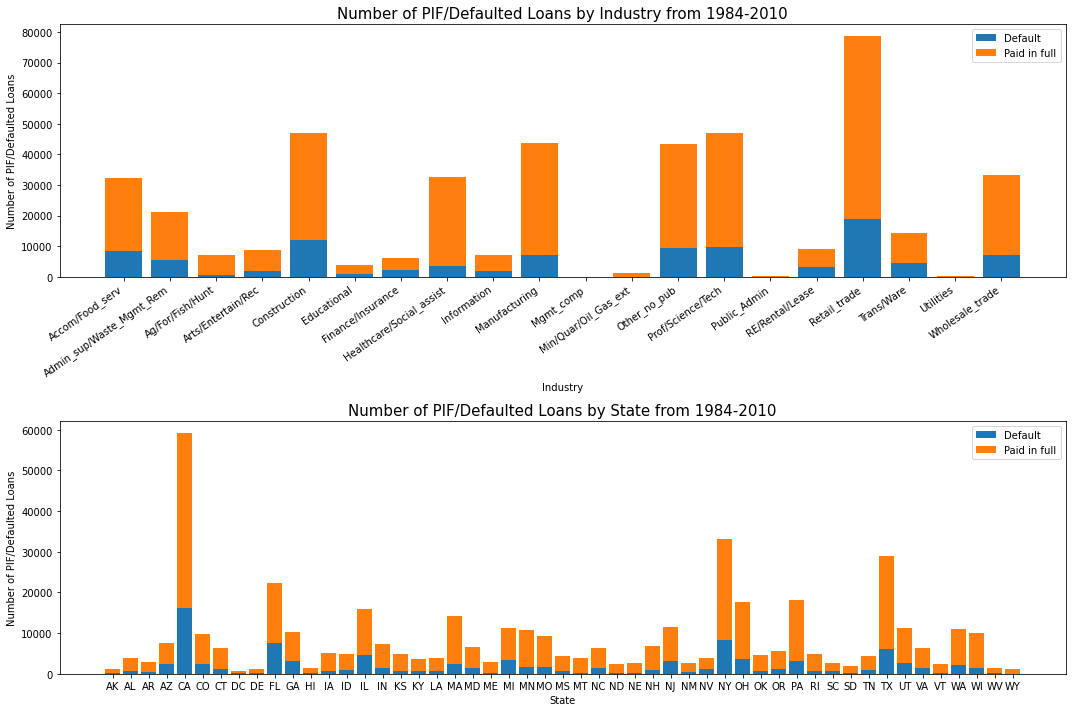

In [52]:
# Paid in full and defaulted loans
fig3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)
    
    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df_copy, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df_copy.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()
# Number of Paid in full and defaulted loans by State
stacked_setup(df=df_copy, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [53]:
# Check Default percentage by Industry
def_ind = df_copy.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,23936,8381,0.259337
Admin_sup/Waste_Mgmt_Rem,15774,5427,0.255978
Ag/For/Fish/Hunt,6536,657,0.091339
Arts/Entertain/Rec,6976,1917,0.215563
Construction,34999,12048,0.256084
Educational,2750,1070,0.280105
Finance/Insurance,3984,2093,0.344413
Healthcare/Social_assist,29192,3571,0.108995
Information,5222,1830,0.259501


In [54]:
# Check Default percentage by State
def_state = df_copy.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

Default,0,1,Def_Percent
State,,,
AK,979,94,0.087605
AL,3192,805,0.201401
AR,2414,528,0.179470
AZ,5119,2473,0.325738
CA,42983,16138,0.272966
CO,7439,2349,0.239988
CT,5328,1064,0.166458
DC,567,157,0.216851
DE,841,246,0.226311


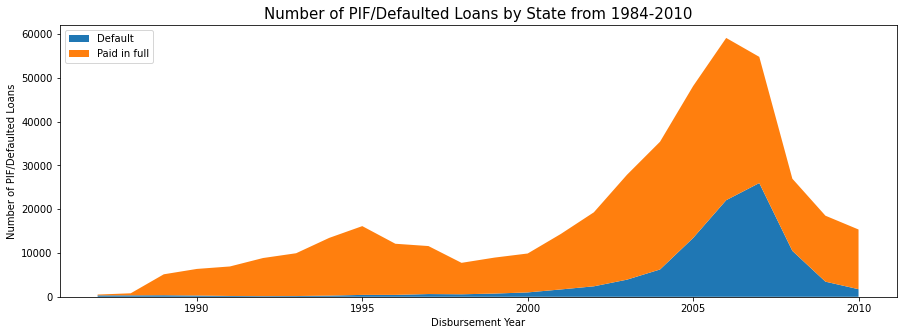

In [55]:
# Paid in full and Defaulted loans by DisbursementFY
# Decided to use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df_copy.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

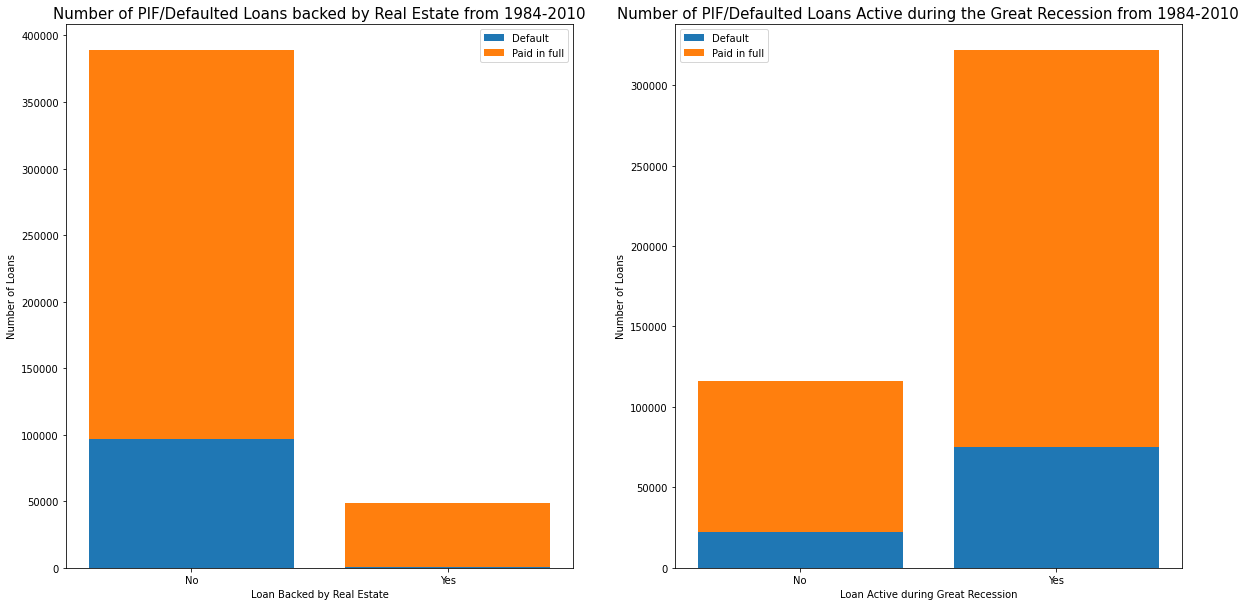

In [56]:
# Paid in full and defaulted loans backed by Real Estate
fig5 = plt.figure(figsize=(20, 10))

ax1b = fig5.add_subplot(1, 2, 1)
ax2b = fig5.add_subplot(1, 2, 2)

stacked_setup(df=df_copy, col='RealEstate', axes=ax1b)
ax1b.set_xticks(df_copy.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default').index)
ax1b.set_xticklabels(labels=['No', 'Yes'])

ax1b.set_title('Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010', fontsize=15)
ax1b.set_xlabel('Loan Backed by Real Estate')
ax1b.set_ylabel('Number of Loans')
ax1b.legend()
# Paid in full and defaulted loans active during the Great Recession
stacked_setup(df=df_copy, col='GreatRecession', axes=ax2b)
ax2b.set_xticks(df_copy.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default').index)
ax2b.set_xticklabels(labels=['No', 'Yes'])

ax2b.set_title('Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010', fontsize=15)
ax2b.set_xlabel('Loan Active during Great Recession')
ax2b.set_ylabel('Number of Loans')
ax2b.legend()

plt.show()

In [57]:
# Check Default percentage for loans backed by Real Estate
def_re = df_copy.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default')
def_re['Def_Percent'] = def_re[1]/(def_re[1] + def_re[0])
def_re

Default,0,1,Def_Percent
RealEstate,,,
0,292446,96587,0.248275
1,48371,686,0.013984


In [58]:
# Check Default percentage for loans active during the Great Recession
def_gr = df_copy.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default')
def_gr['Def_Percent'] = def_gr[1]/(def_gr[1] + def_gr[0])
def_gr

Default,0,1,Def_Percent
GreatRecession,,,
0,94279,22030,0.189409
1,246538,75243,0.233833


In [59]:
df_copy.dtypes

State                    object
BankState                object
ApprovalFY                int64
Term                      int64
NoEmp                     int64
CreateJob                 int64
RetainedJob               int64
UrbanRural               object
RevLineCr                 int32
LowDoc                    int32
DisbursementGross       float64
GrAppv                  float64
Industry                 object
IsFranchise               int64
NewBusiness               int64
Default                   int32
DaysToDisbursement        int64
DisbursementFY            int64
StateSame                 int32
SBA_AppvPct             float64
AppvDisbursed             int32
RealEstate                int32
GreatRecession            int32
DisbursedGreaterAppv      int32
dtype: object

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438090 entries, 0 to 899161
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   State                 438090 non-null  object 
 1   BankState             438090 non-null  object 
 2   ApprovalFY            438090 non-null  int64  
 3   Term                  438090 non-null  int64  
 4   NoEmp                 438090 non-null  int64  
 5   CreateJob             438090 non-null  int64  
 6   RetainedJob           438090 non-null  int64  
 7   UrbanRural            438090 non-null  object 
 8   RevLineCr             438090 non-null  int32  
 9   LowDoc                438090 non-null  int32  
 10  DisbursementGross     438090 non-null  float64
 11  GrAppv                438090 non-null  float64
 12  Industry              438090 non-null  object 
 13  IsFranchise           438090 non-null  int64  
 14  NewBusiness           438090 non-null  int64  
 15  

In [61]:
# One-hot encode categorical data
df_copy = pd.get_dummies(df_copy)

df_copy.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,0,0,0,1,60000.0,60000.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,1,40000.0,40000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,287000.0,287000.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,517000.0,517000.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,1,45000.0,45000.0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
# Establish target and feature fields
y = df_copy['Default']
x = df_copy.drop('Default', axis=1)

# Scale the feature values prior to modeling
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)


In [63]:
# we normalise the dataset
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.03141511e+00, -1.47540273e-01, -1.00435454e-01,
        -1.11706064e-01, -2.97904342e-01, -8.49429706e-01,
         4.06027470e+00, -4.22716694e-01, -3.70951924e-01,
        -1.77698387e-01,  1.67044738e+00,  3.40778199e+00,
        -6.85582166e-01, -9.11855215e-01,  8.11190367e-01,
         7.55949621e-01, -3.55105396e-01, -1.66331130e+00,
        -6.77557449e-01, -4.95508028e-02, -9.59567837e-02,
        -8.22248024e-02, -1.32798305e-01, -3.94974486e-01,
        -1.51172199e-01, -1.21682568e-01, -4.06861667e-02,
        -4.98738119e-02, -2.32172472e-01, -1.54557927e-01,
        -5.71661296e-02, -1.09216004e-01, -1.06705883e-01,
        -1.94727765e-01,  7.61434112e+00, -1.06355225e-01,
        -9.28931901e-02, -9.60294420e-02, -1.82367591e-01,
        -1.22865250e-01, -8.04762389e-02, -1.62443037e-01,
        -1.59540486e-01, -1.47392947e-01, -1.01082667e-01,
        -9.35037188e-02, -1.21227781e-01, -7.56517013e-02,
        -7.74766223e-02, -1.26388100e-01, -1.63880657e-0

# Logistic Regression

In [64]:
# Initialize model
log_reg = LogisticRegression(penalty='l1',solver="liblinear",random_state=2)

# Train the model and make predictions
log_reg.fit(x_train, y_train)
y_pred= log_reg.predict(x_test)

# Print the results
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.895     0.953     0.923     85139
           1      0.786     0.608     0.686     24384

    accuracy                          0.876    109523
   macro avg      0.840     0.780     0.804    109523
weighted avg      0.871     0.876     0.870    109523



# Dercision Tree ------------------------

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier1= DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred2= classifier1.predict(x_test)
#np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred2)

array([[81309,  3694],
       [ 3823, 20697]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred2)

0.9313660144444545

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     85003
           1       0.85      0.84      0.85     24520

    accuracy                           0.93    109523
   macro avg       0.90      0.90      0.90    109523
weighted avg       0.93      0.93      0.93    109523



# --K-NN---

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier2= KNeighborsClassifier()
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
y_pred3= classifier2.predict(x_test)
#np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred3)

array([[79974,  5029],
       [10437, 14083]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred3)

0.8587876519087315

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     85003
           1       0.74      0.57      0.65     24520

    accuracy                           0.86    109523
   macro avg       0.81      0.76      0.78    109523
weighted avg       0.85      0.86      0.85    109523



# ----naive bayes------

In [61]:
from sklearn.naive_bayes import GaussianNB
classifier3= GaussianNB()
classifier3.fit(x_train,y_train)

GaussianNB()

In [62]:
y_pred4= classifier3.predict(x_test)
#np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred4)

array([[37484, 47710],
       [ 3012, 21317]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred4)

0.536882663915342

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60     85194
           1       0.31      0.88      0.46     24329

    accuracy                           0.54    109523
   macro avg       0.62      0.66      0.53    109523
weighted avg       0.79      0.54      0.57    109523



# --Random Forest--

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier4= RandomForestClassifier(criterion="entropy",random_state=0)
classifier4.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [63]:
y_pred5= classifier4.predict(x_test)
#np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred5)

array([[83391,  1776],
       [ 4121, 20235]], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred5)

0.9461574281201209

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85167
           1       0.92      0.83      0.87     24356

    accuracy                           0.95    109523
   macro avg       0.94      0.90      0.92    109523
weighted avg       0.95      0.95      0.95    109523



# ------SVM------

In [54]:
from sklearn.svm import SVC
classifier5= SVC(kernel="rbf",random_state=0)
classifier5.fit(x_train,y_train)

SVC(random_state=0)

In [55]:
y_pred6= classifier5.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred6)

array([[82321,  2892],
       [ 7644, 16666]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred6)

0.9038010280945555

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     85213
           1       0.85      0.69      0.76     24310

    accuracy                           0.90    109523
   macro avg       0.88      0.83      0.85    109523
weighted avg       0.90      0.90      0.90    109523



# XGboost

In [83]:
from xgboost import XGBClassifier
classifier7 = XGBClassifier()
classifier7.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred7 = classifier7.predict(x_test)
cm = confusion_matrix(y_test, y_pred7)
print(cm)
accuracy_score(y_test, y_pred7)

[[83107  2087]
 [ 2732 21597]]


0.9560001095660272

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85194
           1       0.91      0.89      0.90     24329

    accuracy                           0.96    109523
   macro avg       0.94      0.93      0.94    109523
weighted avg       0.96      0.96      0.96    109523



# ENSEMBLE LEARNING

# Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
classifier8= GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
classifier8.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [88]:
y_pred_gb= classifier8.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
#print(np.concatenate((y_pred_gb.reshape(len(y_pred_gb),1),y_test.reshape(len(y_test),1)),axis=1))

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_gb))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gb))

accuracy_score(y_test,y_pred_gb)

[[82146  3048]
 [ 4376 19953]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     85194
           1       0.87      0.82      0.84     24329

    accuracy                           0.93    109523
   macro avg       0.91      0.89      0.90    109523
weighted avg       0.93      0.93      0.93    109523



0.932215151155465

# Adaboost

In [90]:
from sklearn.ensemble import AdaBoostClassifier
classifier9= AdaBoostClassifier(n_estimators=100,random_state=0)
classifier9.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [92]:
y_pred_ab= classifier9.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
#print(np.concatenate((y_pred_ab.reshape(len(y_pred_ab),1),y_test.reshape(len(y_test),1)),axis=1))

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_ab))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ab))

accuracy_score(y_test,y_pred_ab)

[[81563  3631]
 [ 4481 19848]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     85194
           1       0.85      0.82      0.83     24329

    accuracy                           0.93    109523
   macro avg       0.90      0.89      0.89    109523
weighted avg       0.93      0.93      0.93    109523



0.9259333655944414

# Bagging

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
classifier10= BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0)
classifier10.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [60]:
y_pred_boost= classifier10.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
#print(np.concatenate((y_pred_boost.reshape(len(y_pred_boost),1),y_test.reshape(len(y_test),1)),axis=1))

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_boost))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_boost))

accuracy_score(y_test,y_pred_boost)

[[82381  2832]
 [ 7685 16625]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     85213
           1       0.85      0.68      0.76     24310

    accuracy                           0.90    109523
   macro avg       0.88      0.83      0.85    109523
weighted avg       0.90      0.90      0.90    109523



0.9039745076376652

In [2]:
Accuracy = ( 0.874,0.9313660144444545,0.8587876519087315,0.536882663915342,0.9461574281201209,0.9038010280945555,0.9560001095660272,
           0.932215151155465,0.9259333655944414,0.9039745076376652)

In [3]:
Classifier = ["LR","DT","KNN","NB","RF","SVM","XGB","GB","AB","Bag"]

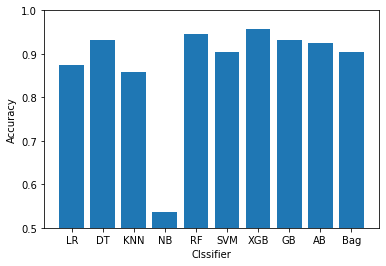

In [10]:
plt.bar(Classifier,Accuracy)
plt.ylim([0.5,1])
plt.xlabel("Clssifier")
plt.ylabel("Accuracy")
plt.savefig('test_1.jpg')

In [4]:
F1_score = (0.92,0.96,0.91,0.60,0.97,0.94,0.97,0.96,0.95,0.94)

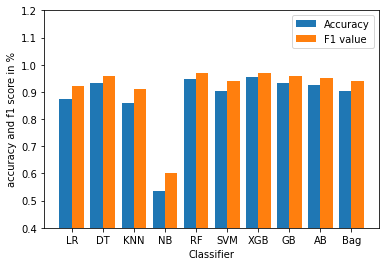

In [7]:
w=0.4
bar1=np.arange(len(Classifier))
plt.ylim([0.4,1.2])

bar2=[i+w for i in bar1]
plt.bar(bar1,Accuracy,0.4,label="Accuracy")
plt.bar(bar2,F1_score,0.4,label="F1 value")
plt.xlabel("Classifier")
plt.ylabel("accuracy and f1 score in %")
plt.xticks(bar1+w/2,Classifier)
plt.legend()
plt.savefig('test_2.jpg')